<h1 style='text-align: center; color: lightblue; font-size: 40px'> RNN and LSTM </h1>
<h2 style='text-align: center; color: lightblue; font-size: 30px'> RNN </h2>

# The idea of recurrence

<a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/"> source </a>

<p style="font-size:120%">A glaring limitation of Vanilla Neural Networks (and also Convolutional Networks) is that their API is too constrained: they accept a fixed-sized vector as input (e.g. an image) and produce a fixed-sized vector as output (e.g. probabilities of different classes). Not only that: These models perform this mapping using a fixed amount of computational steps (e.g. the number of layers in the model).</p>

<img src="http://karpathy.github.io/assets/rnn/diags.jpeg">

<p style="font-size:120%">The important idea of RNN is that the output is calculated using not only the input, but also the previous state of the hidden layer ! But this previous state was influenced by the previous input (and past previous states, which were influenced by past inputs, and so on...) </p>

# The core equation

At the beginning of the class, we saw the equation for a linear regression. What is the equation for a RNN ?

In [1]:
class RNN():
    #...
    def step(self, x):
        # update the hidden state
        self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x))
        # compute the output vector
        y = np.dot(self.W_hy, self.h)
        return y

* self.h: the hidden <i> state </i>, initiliazed with the zero vector
* W_hh, W_xh, W_hy: <i> parameters </i> to be learned through backprop
* * W_xh : turns the one-hot encoded input vector into embeddings of size vocab-size, size vocab_size * num_hidden
* * W_hh : size num_hidden * num_hidden 
* * W_hy : size num_hidden * vocab_size
* np.dot(): matrix multiplication (nowadays performed with @ )

Note: LSTM has just a more complex self.h = ... equation

# But what is self.h ? 

<img src="https://miro.medium.com/max/700/1*NKhwsOYNUT5xU7Pyf6Znhg.png" />

It's a vector which contains information about what happened before. It encodes the context of the sentence.

We pass it as input to the next calculation, as well as the Xt+1

For example, if the sentence is "My coach is a good man", for the last prediction, we pass "good" to the model, as well as a vector h that contains the context for "My coach is a"

# Hello: RNN from scratch ?

not this time: instead we will deconstruct code from <a href="https://medium.com/@mliuzzolino/hello-rnn-55a9237b7112"> this article </a>

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

## Setup data

In [1]:
class DataHandler:
    def __init__(self, string):
        self.string = string
        
        characters = np.sort(list(set(string)))
        self.num_characters = len(characters)
        
        self.char_to_idx = { ch : i for i, ch in enumerate(characters) }
        self.idx_to_char = { i : ch for ch, i in self.char_to_idx.items() }
        
        self._process()
        
    def _process(self):
        data_torch = torch.tensor([self.make_onehot(ele).data.numpy() for ele in self.string])

        self.X = data_torch[:-1].float()
        self.y = torch.argmax(data_torch[1:], dim=1).long()
        
    def make_onehot(self, char):
        return torch.eye(self.num_characters)[self.char_to_idx[char]].float()

###  deconstruct

EXERCISE: for each Q below, print some code and add a commentary

#### data

In [2]:
string = 'Hello!'

In [3]:
# Q: in the above code, find the line where we get the different unique characters of our string and sort them


# Q: How many different characters do we have ? 


# Q: how does np.sort orders punctuation compared to letters ? 


In [4]:
# What does char_to_idx and idx_to_char do ? 


In [ ]:
# To emphrasize the ordering of punctuation, print the idx of the character "!"


#### _make_onehot
<code>make_onehot (takes "char" as an argument): 
return torch.eye(self.num_characters)[self.char_to_idx[char]].float()</code>

In [8]:
#Q: first, what does torch.eye(n) do ? 

In [9]:
# Then, what does char_to_idx[char] do ? 

# finally, what does the complete line torch.eye(self.num_characters)[char_to_idx[char]] do ? 


#### process
<code>def _process(self):
    data_torch = torch.tensor([self.make_onehot(ele).data.numpy() for ele in self.string])
    self.X = data_torch[:-1].float()
    self.y = torch.argmax(data_torch[1:], dim=1).long()</code>

In [11]:
# data_torch = torch.tensor([self.make_onehot(ele).data.numpy() for ele in self.string])
# put the list comprehension inside torch.tensor as a classic for loop:


tensor([0., 1., 0., 0., 0.])
tensor([0., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0.])


In [12]:
# list comprehensions:
[torch.eye(5)[char_to_idx[ele]] for ele in string]

[tensor([0., 1., 0., 0., 0.]),
 tensor([0., 0., 1., 0., 0.]),
 tensor([0., 0., 0., 1., 0.]),
 tensor([0., 0., 0., 1., 0.]),
 tensor([0., 0., 0., 0., 1.]),
 tensor([1., 0., 0., 0., 0.])]

###### Why .data.numpy() ? 

In [21]:
torch.tensor([torch.eye(5).numpy()]) # try removing the .numpy()

tensor([[[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]]])

In [16]:
# This will work
torch.tensor([torch.tensor(1), torch.tensor(2)])

tensor([1, 2])

In [17]:
# but this won't 
torch.tensor([torch.tensor([1, 2]), torch.tensor([2, 2])])

ValueError: only one element tensors can be converted to Python scalars

In [13]:
# doesn't work; 
print(type([torch.eye(5)[char_to_idx[ele]] for ele in string][0]))
torch.tensor([torch.eye(5)[char_to_idx[ele]] for ele in string])  

<class 'torch.Tensor'>


ValueError: only one element tensors can be converted to Python scalars

In [26]:
# make it work:

Takeaway: when you see this error, remember to use .data.numpy()

In [18]:
# In the end, the line:
# torch.tensor([torch.eye(5)[char_to_idx[ele]].data.numpy() for ele in string])
# just gives back a one-hot encoded tensor for each character in the string
# the last tensor has a "one" in the first position, because "!" has value 0 in the
# char_to_idx dictionnary, and it has value 0 it the char_to_idx dictionnary because
sorted('l?a!')
# sorted() sorts puctuation before letters

['!', '?', 'a', 'l']

### set up the data using our DataHandler class

In [27]:
# Use the DataHandler class with the Hello! string to create your data
data = DataHandler("Hello!")

In [31]:
# As we've seen, make one_hot gives you your input vector
data.make_onehot('H')

tensor([0., 1., 0., 0., 0.])

In [32]:
# here is all your data: 
data.X

tensor([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [33]:
# And the labels associated: 
data.y

tensor([2, 3, 3, 4, 0])

In [34]:
# use a loop to print each data point with its associated label:
# For example, when we pass "H" to the model, we want it to predict 2 ( parce que data.idx_to_char[2] = e)
# hint: I used zip()

tensor([0., 1., 0., 0., 0.]) tensor(2)
tensor([0., 0., 1., 0., 0.]) tensor(3)
tensor([0., 0., 0., 1., 0.]) tensor(3)
tensor([0., 0., 0., 1., 0.]) tensor(4)
tensor([0., 0., 0., 0., 1.]) tensor(0)


## Model

### deconstruct RNNCell

In [23]:
class RNNCell(nn.Module):
    def __init__(self, num_chars, num_hidden):
        super().__init__()
        
        self.num_chars = num_chars
        self.num_hidden = num_hidden
        
        # Network Parameters
        # Potential Input
        self.Wxh = nn.Parameter(torch.randn((num_chars, num_hidden)))
        self.Whh = nn.Parameter(torch.randn((num_hidden, num_hidden)))
        self.bh = nn.Parameter(torch.zeros((num_hidden)))
        
        # Hidden -> Output
        self.Why = nn.Parameter(torch.randn((num_hidden, num_chars)))
        self.by = nn.Parameter(torch.zeros((num_chars))) 
        
        # Activations
        self.tanh = nn.Tanh()
    
    def init(self):
        # Initialize hidden state to zero
        self.h = torch.zeros((self.num_hidden))
        
    def forward(self, x):
        # here is the "model", the equation presented above
        self.h = self.tanh((x @ self.Wxh) + (self.h @ self.Whh + self.bh))
        y_output = self.h @ self.Why + self.by
        return y_output

In [48]:
# just like a fully connected neural net, you pick your number of hidden neurons
num_hidden = 60
num_chars = data.num_characters

Wxh = torch.randn((num_chars, num_hidden))
Wxh.shape

torch.Size([5, 60])

In [49]:
# now you can start plugging the numbers:
result1 = data.X[0] @ Wxh
print(result1.shape)

torch.Size([60])


In [50]:
# deconstructing this line: self.h = self.tanh((x @ self.Wxh) + (self.h @ self.Whh + self.bh))
h = torch.zeros((num_hidden))
Whh = torch.randn((num_hidden, num_hidden))
bh = torch.zeros(num_hidden)
print("hidden state shape: " + str(h.shape))
print("Whh shape: " + str(Whh.shape))
print("bh shape: " + str(bh.shape))
result2 = h @ Whh + bh
print("We output a vector of size num_hidden")
print(result2.shape)

hidden state shape: torch.Size([60])
Whh shape: torch.Size([60, 60])
bh shape: torch.Size([60])
We output a vector of size num_hidden
torch.Size([60])


In [51]:
# As you can see, hidden state for next input is indeed the same as initial hidden state shape
nn.Tanh()(result1+result2).shape

torch.Size([60])

In [27]:
# deconstructing this line: y_output = self.h @ self.Why + self.by
Why = torch.randn((num_hidden, num_chars))
bh = torch.randn(num_chars)
print((h @ Why + bh).shape)
h @ Why + bh

torch.Size([5])


tensor([ 0.7424,  1.3627, -0.4633, -0.8275,  1.1662])

In [28]:
my_rnn_cell = RNNCell(5, 50)
print(isinstance(my_rnn_cell, nn.Module))
print(hasattr(nn.Module, "parameters"))

True
True


In [29]:
# Classes: what happens is when you subclass nn.Module, 
# it will register for you every time you add a nn.parameter:

for param in my_rnn_cell.parameters():
    print(param.shape)

torch.Size([5, 50])
torch.Size([50, 50])
torch.Size([50])
torch.Size([50, 5])
torch.Size([5])


<b> note that self.h is NOT a parameter. It's the state of the cell. It's not updated directly by backprop </b>

### deconstruct HelloRNN

In [30]:
class HelloRNN(nn.Module):    
    def __init__(self, num_chars, num_hidden=10):
        super().__init__()

        self.cell = RNNCell(num_chars, num_hidden)       
        self._init_weights()
    
    def _init_weights(self):
        for param in self.cell.parameters():  # this is just what we did above
            param.requires_grad_(True)  # not necessary here but a good practice
            
            if param.data.ndimension() >= 2:
                # we won't go into much detail for this
                # just remember that if we set our parameters for a
                # linear regression to bad numbers it can ruin the
                # training. Xavier Glorot has come up with some good ideas
                # to find good numbers to start with
                nn.init.xavier_uniform_(param.data)
            else:
                # self.bh and self.by are just biases, they can be initially set to 0
                nn.init.zeros_(param.data)
                
    def forward(self, X):
        # Setup outputs container
        outputs = torch.zeros_like(X)
        
        # Iterate through sequence
        self.cell.init()
        for i, x in enumerate(X):
            # this takes one line of X i.e [0., 1., 0., 0., 0.]
            # representing the h. And asks for an output of size ...? 
            outputs[i] = self.cell(x)
            
        return outputs
    
    # we won't analyze generate into too much detail, but you are free to do this at home :-)
    def generate(self, data, init_char, num_steps=5):
        # Check for valid character
        if init_char not in data.char_to_idx:
            avail_chars = ",".join(data.char_to_idx.keys())
            print(f"Character not in vocab. Pick another from: {avail_chars}")
            return

        self.eval()

        # Setup feed
        feed = torch.zeros((num_steps, data.num_characters))
        feed[0] = data.make_onehot(init_char).unsqueeze(dim=0)

        output = [init_char]
        for predict_i in range(num_steps-1):
            feed_in = feed[:predict_i+1]
            next_chars = self(feed_in)[-1]
            
            next_char_idx = torch.argmax(next_chars).item()
            next_char = data.idx_to_char[next_char_idx]

            feed[predict_i+1] = data.make_onehot(next_char).unsqueeze(dim=0)
            output.append(next_char)

        output_str = "".join(output)
        return output_str

### Train !

In [31]:
# Use our class to define a network
net = HelloRNN(num_chars=data.num_characters, num_hidden=50)

In [32]:
# we saw this morning and last week what an optimiser does
optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# store the losses (just to plot a graph)
losses = []

Epoch 1/5000 -- Loss: 1.8737 -- Network out: H!l!H!
Epoch 11/5000 -- Loss: 1.3098 -- Network out: H!lll!
Epoch 21/5000 -- Loss: 0.9096 -- Network out: H!llo!
Epoch 31/5000 -- Loss: 0.6387 -- Network out: H!llo!
Epoch 41/5000 -- Loss: 0.4683 -- Network out: Hello!

Ending early. Converged in 40 epochs.


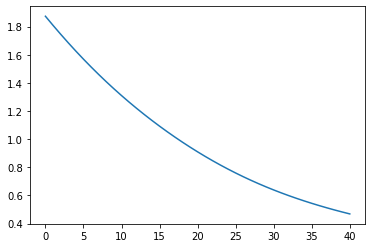

In [33]:
N_EPOCHS = 5000
LR = 0.005
end_early = False
seq_i = ""

net.train() # Ensure net in training mode
for epoch_i in range(N_EPOCHS):
    # Zero out gradients
    optimizer.___________
    
    # Get net output, calculate loss, and generate gradients
    output = ___(______)
    loss = criterion(______, ____._)
    
    # This is where the magic happens
    loss.__________ # Generate gradients via autodiff
    
    # Step
    # -----------------------------------
    # Clip params
    for param in net.parameters():
        if param.grad is None:
            continue
        grad_val = torch.clamp(param.grad, -5, 5)
    optimizer.______
    # some people put the optimizer.zero_grad() here
    # -----------------------------------
    
    # Track loss
    losses.append(loss.item())
    
    # Qualitative Eval
    if epoch_i % 10 == 0:
        seq_i = net.generate(data, data.string[0], num_steps=len(data.string))
        
        if seq_i == data.string:
            end_early = True
            
        # Stdout
        # --------------------------------
        print(f'\rEpoch {epoch_i+1}/{N_EPOCHS} -- Loss: {losses[-1]:0.4f} -- Network out: {seq_i}')
    
    if end_early:
        print(f"\nEnding early. Converged in {epoch_i} epochs.")
        break
    
plt.plot(losses)

# Make a "prediction"

In [46]:
init_char = data.string[0]
net.generate(data, init_char, num_steps=6)

'Hello!'

# Takeaways 

* RNN and LSTM are the same thing. The second just has a more complicated equation
* what is powerful with RNN: they don't have a fixed input and output !
* Text is passed as numbers. Here, we used one-hot encoding, but there are plenty of other options